In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [2]:
data=pd.read_csv('moscow_apartment_listings.csv')
data

,price,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,lat,lon,subway_dist_to_center,...,subway_offers,address_offers,rooms,footage,floor,max_floor,first_floor,last_floor,AO,hm
0,8000000,3,0,42,59,960,0.0,55.609009,37.734632,17166,...,5,1.0,1,39.4,11,12,0,0,UAO,panel
1,7200000,2,0,43,59,802,0.0,55.608760,37.741936,17166,...,9,1.0,1,35.6,2,9,0,0,UAO,panel
2,10300000,2,0,43,59,638,0.0,55.610207,37.742495,17166,...,9,2.0,2,53.0,5,12,0,0,UAO,panel
3,8500000,2,0,43,59,929,0.0,55.624017,37.740373,17166,...,5,1.0,2,44.1,8,9,0,0,UAO,panel
4,9000000,2,0,43,59,785,0.0,55.609107,37.740430,17166,...,5,1.0,2,44.2,6,9,0,0,UAO,panel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12176,8700000,2,0,47,135,423,2.0,55.813536,37.470033,11088,...,1,1.0,1,36.2,2,17,0,0,SZAO,monolith
12177,9450000,2,0,31,135,581,2.0,55.809024,37.475441,11088,...,2,1.0,1,38.3,6,22,0,0,SZAO,panel
12178,19000000,4,0,19,135,842,2.0,55.817794,37.464824,11088,...,2,1.0,1,55.8,11,17,0,0,SZAO,monolith
12179,16900000,1,0,19,135,842,2.0,55.817794,37.464824,11088,...,1,1.0,2,62.0,15,17,0,0,SZAO,monolith


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.head()

,price,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,lat,lon,subway_dist_to_center,...,subway_offers,address_offers,rooms,footage,floor,max_floor,first_floor,last_floor,AO,hm
0,8000000,3,0,42,59,960,0.0,55.609009,37.734632,17166,...,5,1.0,1,39.4,11,12,0,0,UAO,panel
1,7200000,2,0,43,59,802,0.0,55.608760,37.741936,17166,...,9,1.0,1,35.6,2,9,0,0,UAO,panel
2,10300000,2,0,43,59,638,0.0,55.610207,37.742495,17166,...,9,2.0,2,53.0,5,12,0,0,UAO,panel
3,8500000,2,0,43,59,929,0.0,55.624017,37.740373,17166,...,5,1.0,2,44.1,8,9,0,0,UAO,panel
4,9000000,2,0,43,59,785,0.0,55.609107,37.740430,17166,...,5,1.0,2,44.2,6,9,0,0,UAO,panel


In [5]:
data.shape

(12181, 22)

In [6]:
data.AO.value_counts()

UVAO    2053
ZAO     1594
UAO     1496
UZAO    1453
SAO     1422
SVAO    1388
VAO     1362
SZAO     760
CAO      653
Name: AO, dtype: int64

In [7]:
data.hm.value_counts()

panel       5731
brick       2483
monolith    2378
block       1589
Name: hm, dtype: int64

In [8]:
pd.isnull(data).any()

price                    False
repair                   False
year_built_empty         False
house_age                False
closest_subway           False
dist_to_subway           False
sg                       False
lat                      False
lon                      False
subway_dist_to_center    False
h3                       False
agent_offers             False
subway_offers            False
address_offers           False
rooms                    False
footage                  False
floor                    False
max_floor                False
first_floor              False
last_floor               False
AO                       False
hm                       False
dtype: bool

In [9]:
data.describe()

,price,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,lat,lon,subway_dist_to_center,agent_offers,subway_offers,address_offers,rooms,footage,floor,max_floor,first_floor,last_floor
count,1.218100e+04,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000,12181.000000
mean,1.086987e+07,2.267302,0.013710,36.360644,100.585009,928.353748,0.242673,55.738639,37.618241,11938.048026,25.429932,10.176915,1.290124,1.603973,46.153803,6.867334,13.449306,0.104671,0.094409
std,3.037320e+06,0.787196,0.116289,21.406406,56.707817,532.443508,0.629897,0.087598,0.134112,4711.729983,61.837916,7.078888,0.730561,0.489090,10.543171,5.313950,6.413437,0.306142,0.292409
min,4.900000e+06,1.000000,0.000000,0.000000,0.000000,11.000000,0.000000,55.527631,37.306055,1133.000000,0.000000,1.000000,1.000000,1.000000,30.100000,1.000000,2.000000,0.000000,0.000000
25%,8.500000e+06,2.000000,0.000000,17.000000,55.000000,548.000000,0.000000,55.674840,37.520435,8635.000000,1.000000,5.000000,1.000000,1.000000,38.000000,3.000000,9.000000,0.000000,0.000000
50%,1.020000e+07,2.000000,0.000000,42.000000,103.000000,820.000000,0.000000,55.730856,37.604411,12418.000000,1.000000,8.000000,1.000000,2.000000,44.500000,5.000000,12.000000,0.000000,0.000000
75%,1.270000e+07,3.000000,0.000000,54.000000,149.000000,1177.000000,0.000000,55.806115,37.720789,14800.000000,11.000000,13.000000,1.000000,2.000000,53.400000,9.000000,17.000000,0.000000,0.000000
max,2.000000e+07,4.000000,1.000000,130.000000,199.000000,2988.000000,3.000000,55.941577,37.950668,24636.000000,292.000000,40.000000,9.000000,2.000000,89.900000,38.000000,39.000000,1.000000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12181 entries, 0 to 12180
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  12181 non-null  int64  
 1   repair                 12181 non-null  int64  
 2   year_built_empty       12181 non-null  int64  
 3   house_age              12181 non-null  int64  
 4   closest_subway         12181 non-null  int64  
 5   dist_to_subway         12181 non-null  int64  
 6   sg                     12181 non-null  float64
 7   lat                    12181 non-null  float64
 8   lon                    12181 non-null  float64
 9   subway_dist_to_center  12181 non-null  int64  
 10  h3                     12181 non-null  object 
 11  agent_offers           12181 non-null  int64  
 12  subway_offers          12181 non-null  int64  
 13  address_offers         12181 non-null  float64
 14  rooms                  12181 non-null  int64  
 15  fo

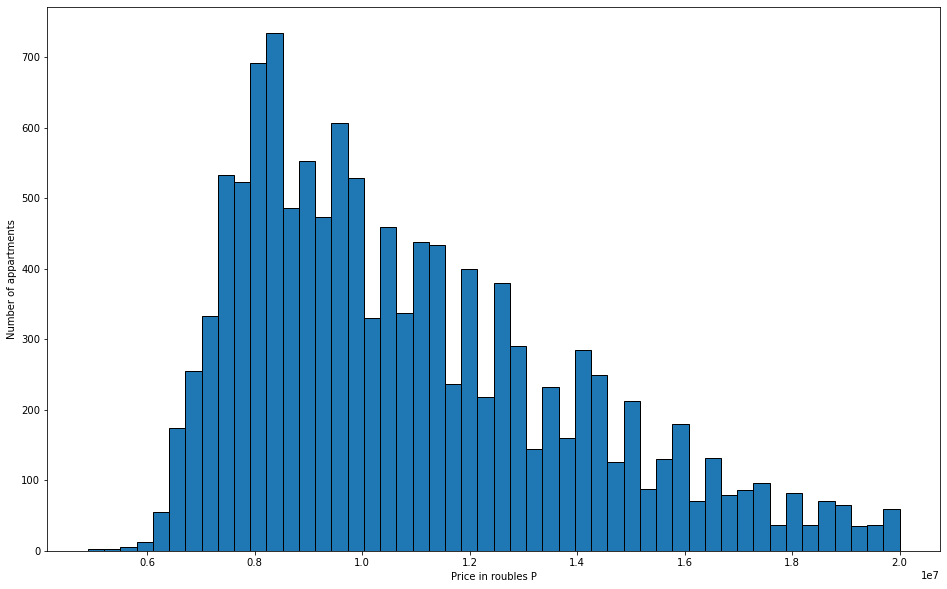

In [11]:
plt.figure(figsize=(16, 10))
plt.hist(data['price'], bins=50, ec='black')
plt.xlabel('Price in roubles P')
plt.ylabel('Number of appartments')
plt.show()

### Geographical Data

<AxesSubplot:xlabel='lat', ylabel='lon'>

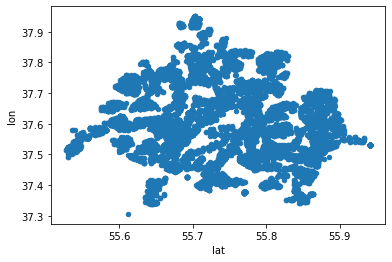

In [12]:
data.plot(kind='scatter', x='lat', y='lon')

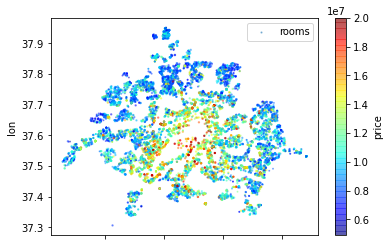

In [13]:
data.plot(kind="scatter", x="lat", y="lon", alpha=0.4, s=data["rooms"], 
            label="rooms", c="price", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

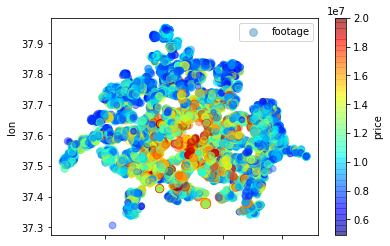

In [14]:
data.plot(kind="scatter", x="lat", y="lon", alpha=0.4, s=data["footage"], 
            label="footage", c="price", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

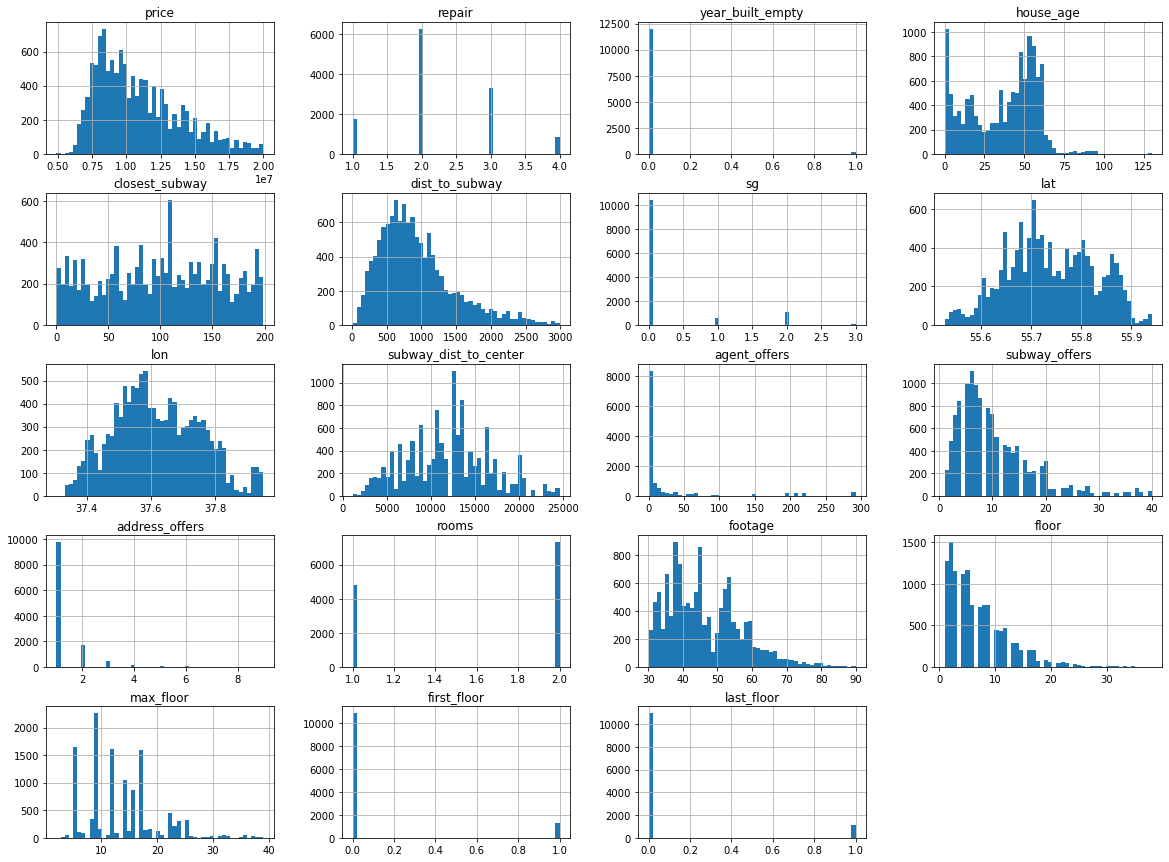

In [15]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

## Correlation
## $$ \rho _{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

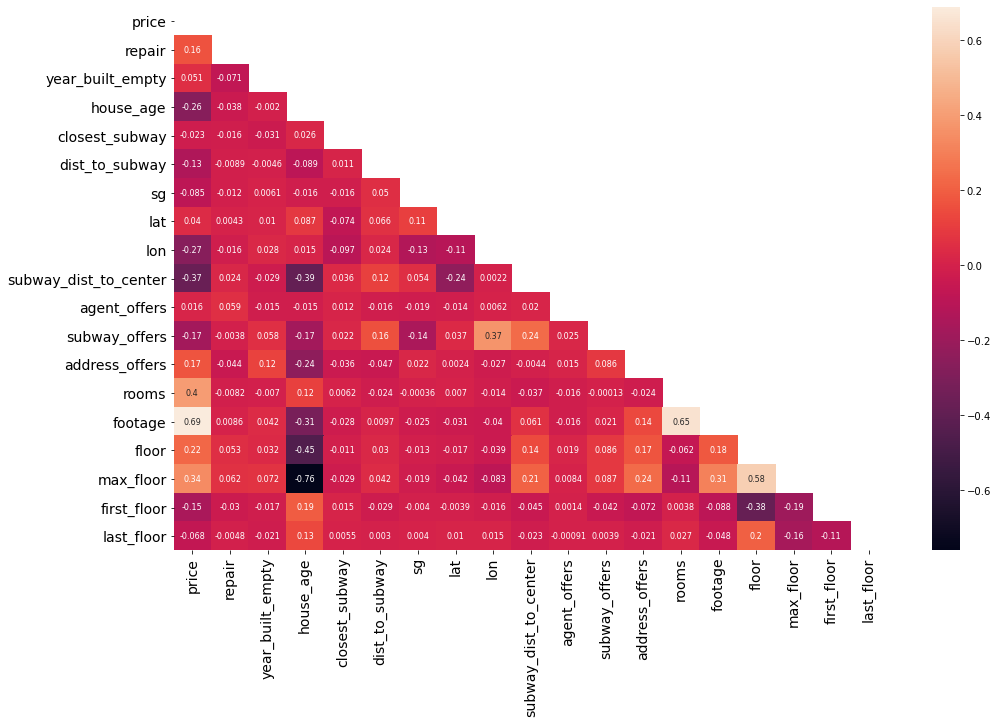

In [16]:
mask=np.zeros_like(data.corr())
triangle_indices=np.triu_indices_from(mask)
mask[triangle_indices]=True
mask

plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size":8})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [17]:
data.corr()

,price,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,lat,lon,subway_dist_to_center,agent_offers,subway_offers,address_offers,rooms,footage,floor,max_floor,first_floor,last_floor
price,1.000000,0.164010,0.051416,-0.262411,-0.023419,-0.133671,-0.085062,0.040003,-0.265155,-0.366405,0.016465,-0.172992,0.171650,0.396066,0.689433,0.224920,0.342601,-0.151585,-0.067709
repair,0.164010,1.000000,-0.070530,-0.038472,-0.016339,-0.008918,-0.012442,0.004259,-0.016068,0.023552,0.059237,-0.003846,-0.044063,-0.008218,0.008575,0.052678,0.062188,-0.030256,-0.004778
year_built_empty,0.051416,-0.070530,1.000000,-0.001986,-0.030985,-0.004648,0.006135,0.010304,0.027939,-0.028596,-0.015011,0.057792,0.120365,-0.007021,0.042489,0.032306,0.071551,-0.017250,-0.021166
house_age,-0.262411,-0.038472,-0.001986,1.000000,0.025786,-0.089263,-0.015728,0.087363,0.015226,-0.385133,-0.015272,-0.172487,-0.241992,0.115085,-0.314398,-0.451621,-0.760865,0.193775,0.134920
closest_subway,-0.023419,-0.016339,-0.030985,0.025786,1.000000,0.010817,-0.016481,-0.074215,-0.097201,0.036289,0.011809,0.022446,-0.036067,0.006211,-0.027841,-0.010780,-0.028875,0.014874,0.005458
dist_to_subway,-0.133671,-0.008918,-0.004648,-0.089263,0.010817,1.000000,0.050013,0.065855,0.023899,0.115726,-0.015708,0.160898,-0.046766,-0.023967,0.009652,0.030321,0.041934,-0.029366,0.002989
sg,-0.085062,-0.012442,0.006135,-0.015728,-0.016481,0.050013,1.000000,0.108401,-0.126096,0.054405,-0.018938,-0.144005,0.021837,-0.000359,-0.025396,-0.012898,-0.019290,-0.004006,0.003979
lat,0.040003,0.004259,0.010304,0.087363,-0.074215,0.065855,0.108401,1.000000,-0.109230,-0.238450,-0.013893,0.036666,0.002436,0.006960,-0.030557,-0.016785,-0.042151,-0.003853,0.009956
lon,-0.265155,-0.016068,0.027939,0.015226,-0.097201,0.023899,-0.126096,-0.109230,1.000000,0.002178,0.006197,0.370867,-0.026960,-0.013513,-0.039559,-0.038598,-0.083484,-0.015948,0.014894
subway_dist_to_center,-0.366405,0.023552,-0.028596,-0.385133,0.036289,0.115726,0.054405,-0.238450,0.002178,1.000000,0.019954,0.241462,-0.004420,-0.037015,0.061321,0.141021,0.213244,-0.044529,-0.023479


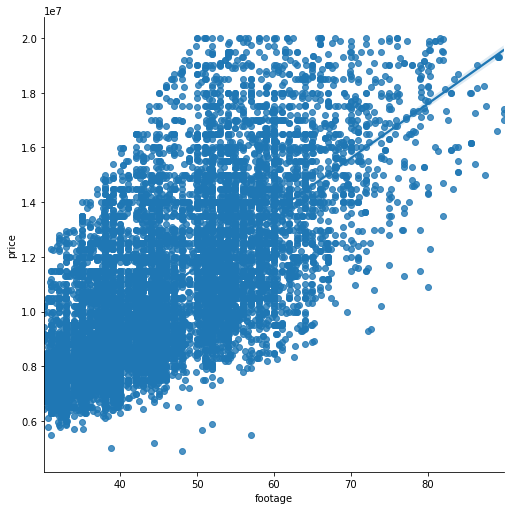

In [18]:
sns.lmplot(x='footage', y='price', data=data, height=7)
plt.show()

In [25]:
prices=data["price"]
features=data.drop(["price", "h3", "AO", "hm"], axis=1)


x_train, x_test, y_train, y_test=train_test_split(features, prices, test_size=0.2, random_state=10)

In [26]:
regr=LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [27]:
print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=x_train.columns, columns=['coef'])

Intercept 313478574.3957532


,coef
repair,5.889235e+05
year_built_empty,6.710461e+05
house_age,-2.651235e+04
closest_subway,-3.242279e+02
dist_to_subway,-4.943997e+02
sg,-3.009079e+05
lat,-1.906630e+06
lon,-5.342497e+06
subway_dist_to_center,-3.172292e+02
agent_offers,1.207714e+03


In [28]:
print('Training data r-squared: ', regr.score(x_train, y_train))
print('Test data r-squared', regr.score(x_test, y_test))

Training data r-squared:  0.800181319244941
Test data r-squared 0.797316992095202


In [29]:
y_pred=regr.predict(x_test)
evaluate=pd.DataFrame({'Actual':y_test.values.flatten(), 'Predicted':y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,11500000,1.112338e+07
1,8500000,9.870822e+06
2,12800000,1.481142e+07
3,7850000,7.904026e+06
4,12500000,1.383836e+07
5,8200000,7.863804e+06
6,8750000,9.637481e+06
7,8100000,8.277627e+06
8,10500000,1.094930e+07
9,13148000,1.300210e+07


<AxesSubplot:>

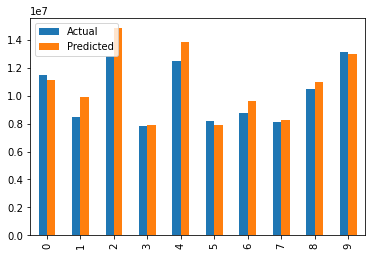

In [30]:
evaluate.head(10).plot(kind='bar')

In [ ]:
x_incl_const=sm.add_constant(x_train)

model=sm.OLS(y_train, x_incl_const)
results=model.fit()

pd.DataFrame({'coef':results.params, 'p-value':round(results.pvalues, 3)})